## Análisis exploratorio de datos de la información de Steel Industry Energy Consumption

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
!wget https://raw.githubusercontent.com/luis-huacho/INF648-Proy-Curso-2024-01/graficos-data/Steel_industry_data.csv



7[Files: 0  Bytes: 0  [0 B/s] Re]87[https://raw.githubusercontent.]870 files              100% [=============================>]      14     --.-KB/s87[Files: 0  Bytes: 14  [22 B/s] ]8

In [5]:
datos_acero = pd.read_csv("Steel_industry_data.csv")
datos_acero.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [6]:
print(">>> Se cuenta el número de datos:")
print(datos_acero.shape)
print("")
print(">>> Se presenta el tipo de variables:")
print(datos_acero.dtypes)
print("")
print(">>> Se genera el número de variables missing:")
print(datos_acero.isna().sum())
print("")
print(">>> Se genera el porcentaje de variables únicas:")
print(datos_acero.nunique() / len(datos_acero))

>>> Se cuenta el número de datos:
(35040, 11)

>>> Se presenta el tipo de variables:
date                                     object
Usage_kWh                               float64
Lagging_Current_Reactive.Power_kVarh    float64
Leading_Current_Reactive_Power_kVarh    float64
CO2(tCO2)                               float64
Lagging_Current_Power_Factor            float64
Leading_Current_Power_Factor            float64
NSM                                       int64
WeekStatus                               object
Day_of_week                              object
Load_Type                                object
dtype: object

>>> Se genera el número de variables missing:
date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                             

In [7]:
# Generamos una tabla de estadísticos descriptivos ordenadas por la desviación estandar
datos_acero.describe().T.round(2).sort_values(by='std', ascending=False)

,count,mean,std,min,25%,50%,75%,max
NSM,35040.0,42750.00,24940.53,0.0,21375.00,42750.00,64125.00,85500.00
Usage_kWh,35040.0,27.39,33.44,0.0,3.20,4.57,51.24,157.18
Leading_Current_Power_Factor,35040.0,84.37,30.46,0.0,99.70,100.00,100.00,100.00
Lagging_Current_Power_Factor,35040.0,80.58,18.92,0.0,63.32,87.96,99.02,100.00
Lagging_Current_Reactive.Power_kVarh,35040.0,13.04,16.31,0.0,2.30,5.00,22.64,96.91
Leading_Current_Reactive_Power_kVarh,35040.0,3.87,7.42,0.0,0.00,0.00,2.09,27.76
CO2(tCO2),35040.0,0.01,0.02,0.0,0.00,0.00,0.02,0.07


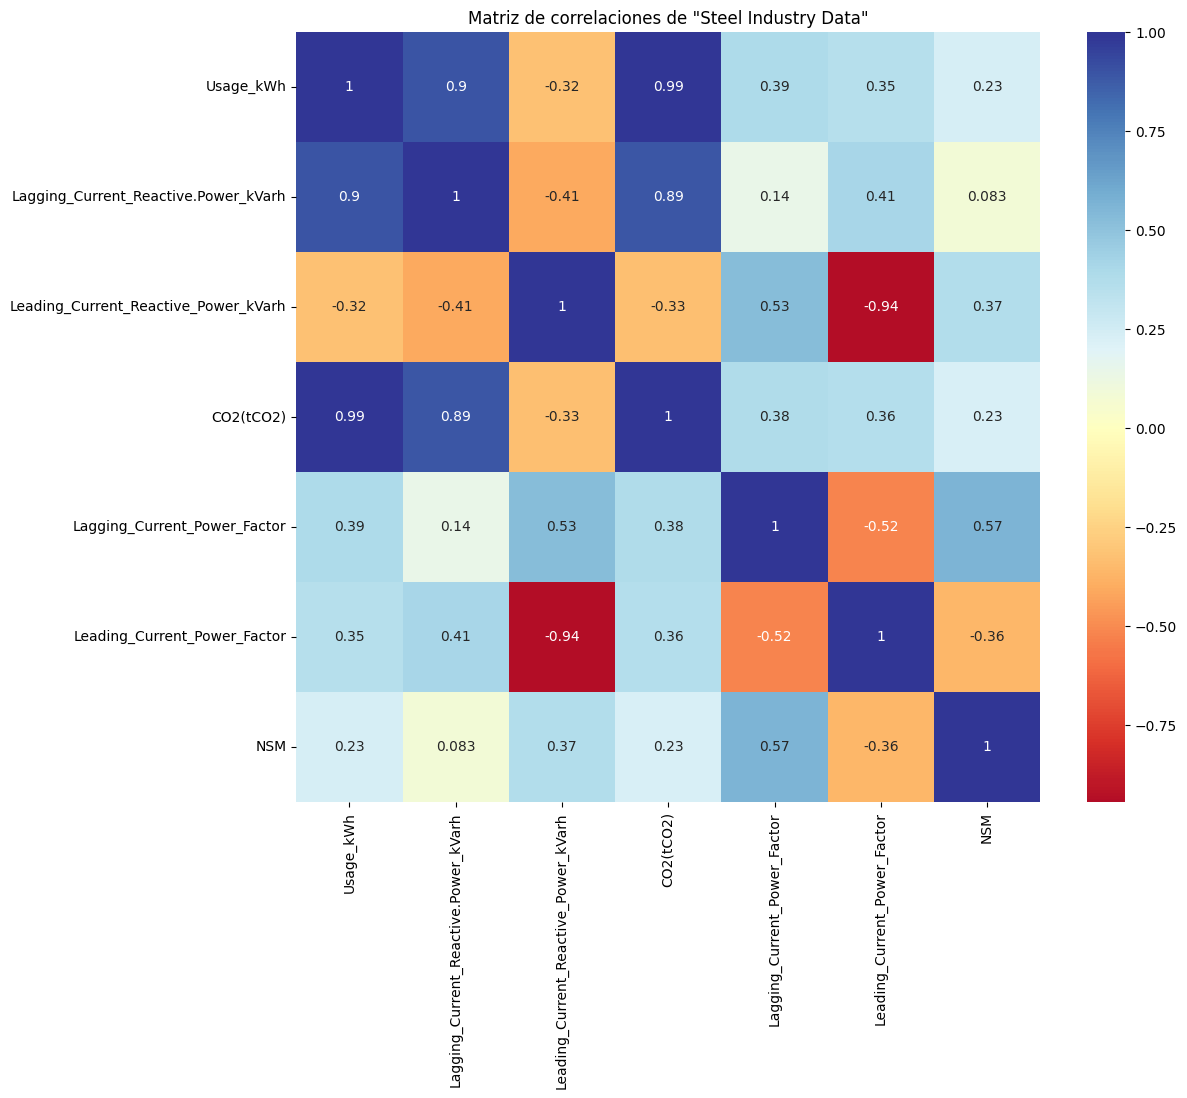

In [8]:
# Para calcular la matriz de correlacion primero se retiran los valores no numéricos
columnas_numero = datos_acero.select_dtypes(include=['float64', 'int64']).columns
datos_acero_numeric = datos_acero[columnas_numero]

# Se calcula la matriz de correlaciones
correlation_matrix = datos_acero_numeric.corr()

# Se dibuja la matriz de correlaciones en un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu', center=0)
plt.title('Matriz de correlaciones de "Steel Industry Data"')
plt.show()

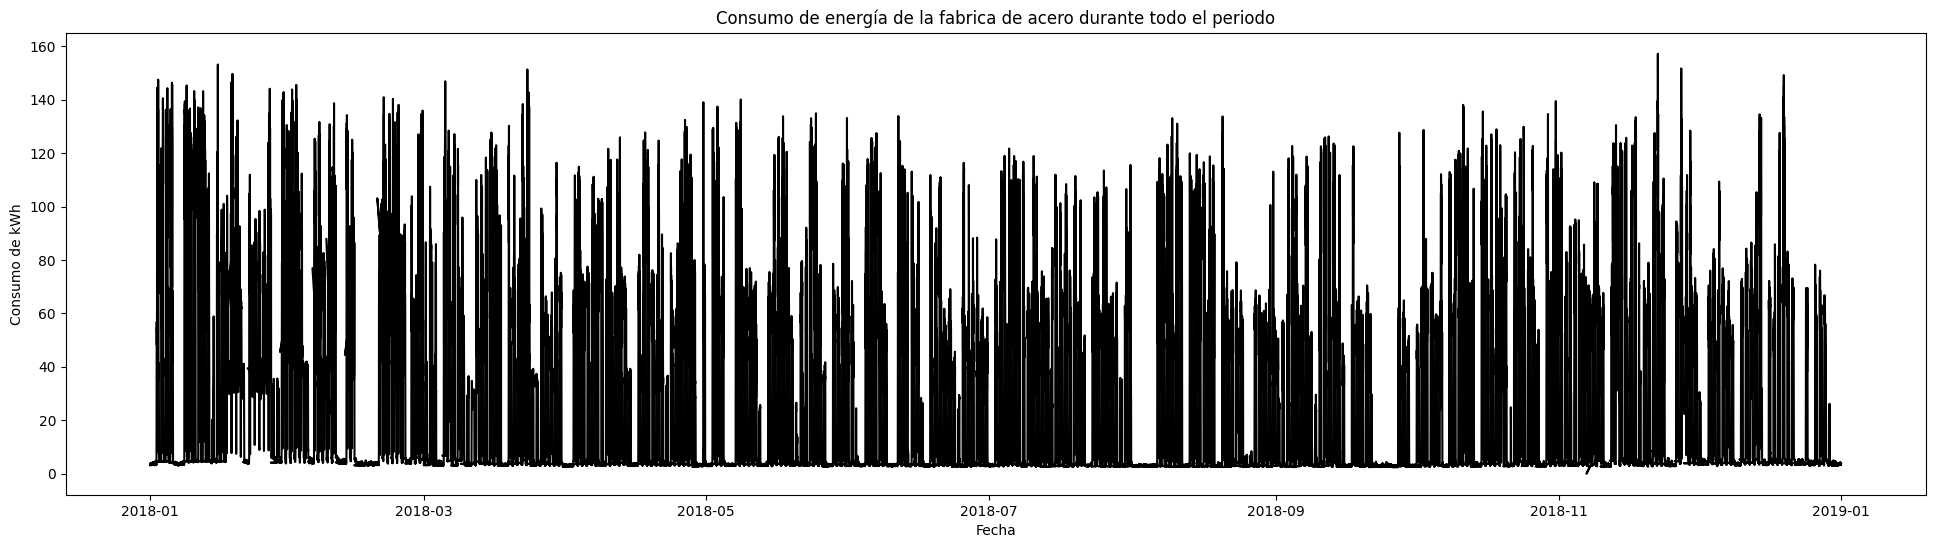

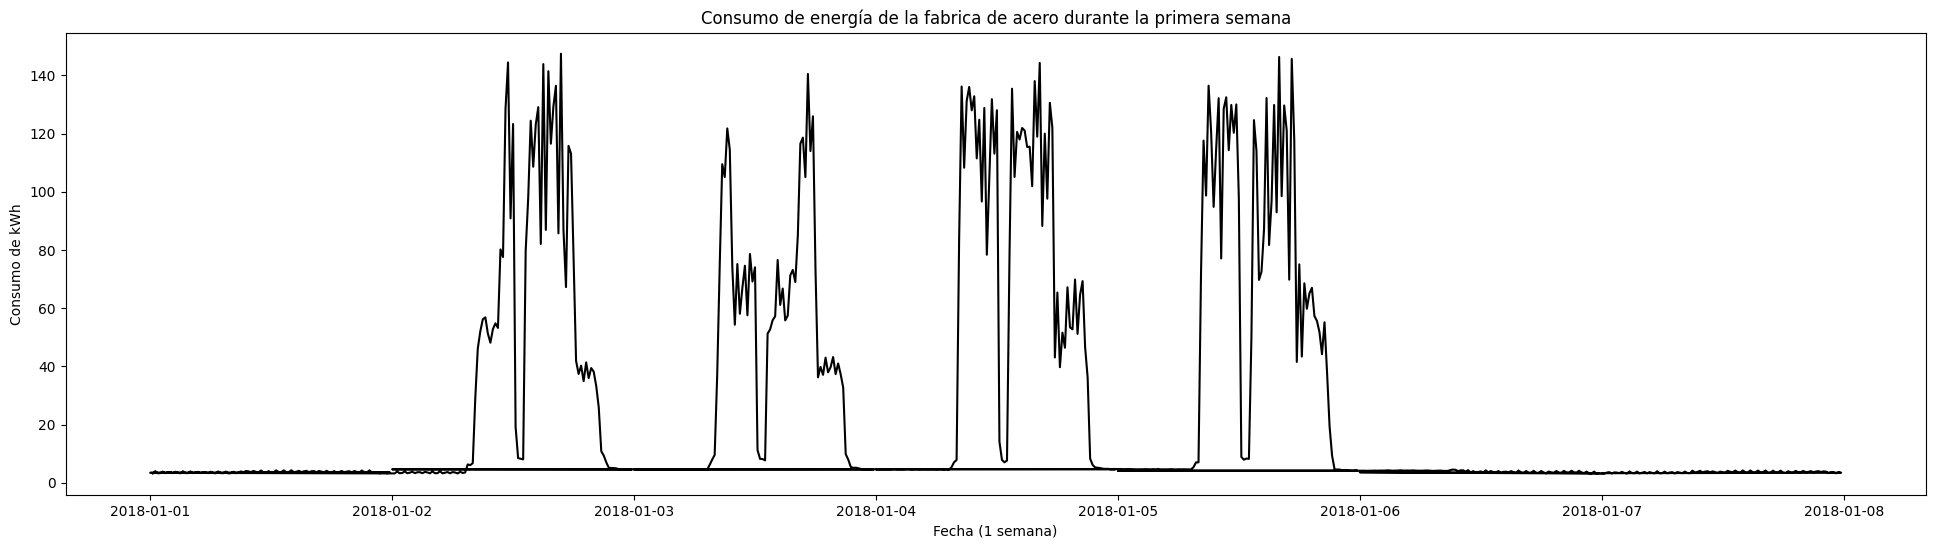

In [67]:
# Generar una nueva variable y convertir la columna fecha (date) en formato datetime
datos_acero_grafico = datos_acero.copy()
datos_acero_grafico['date'] = pd.to_datetime(datos_acero_grafico['date'], format='%d/%m/%Y %H:%M')

# Establecer que la columna fecha (date) sea un índice
datos_acero_grafico.set_index('date', inplace=True)

# Grafico para el periodo entero
plt.figure(figsize=(24, 6))
plt.plot(datos_acero_grafico['Usage_kWh'], color='black')
plt.title('Consumo de energía de la fabrica de acero durante todo el periodo')
plt.xlabel('Fecha')
plt.ylabel('Consumo de kWh')
plt.show()

# Grafico para la primera semana
semana_uno = datos_acero_grafico.loc['2018-01-01':'2018-01-07']

plt.figure(figsize=(24, 6))
plt.plot(semana_uno['Usage_kWh'], color='black')
plt.title('Consumo de energía de la fabrica de acero durante la primera semana')
plt.xlabel('Fecha (1 semana)')
plt.ylabel('Consumo de kWh')
plt.show()

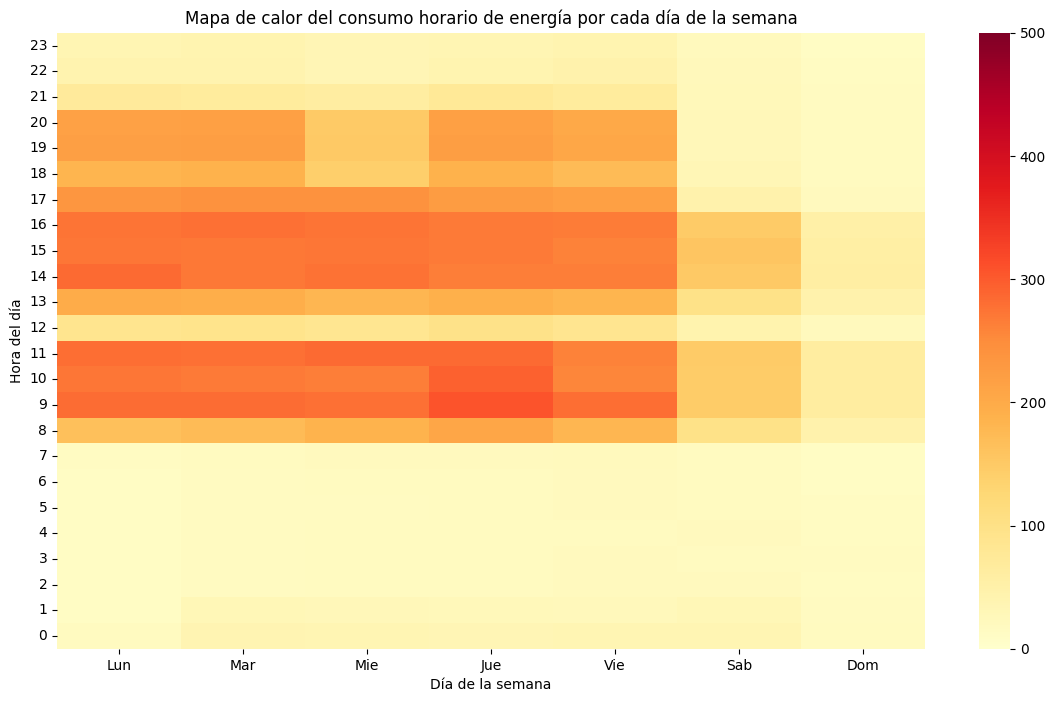

In [11]:
# Convertir la columna 'date' al formato datetime y extraer la información horaria
datos_acero_grafico_2 = datos_acero.copy()
datos_acero_grafico_2['date'] = pd.to_datetime(datos_acero_grafico_2['date'], format='%d/%m/%Y %H:%M')
datos_acero_grafico_2['hour'] = datos_acero_grafico_2['date'].dt.hour

# Definir el orden de los días
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Calcular el número total de horas en el conjunto de datos
total_hours = (datos_acero_grafico_2['date'].max() - datos_acero_grafico_2['date'].min()).total_seconds() / 3600

# Generar tabla pivote de los datos para obtener el uso por hora para cada día de la semana y dividir entre las horas totales, considerando la presentación semanal
pivot_data_calor = datos_acero_grafico_2.pivot_table(values='Usage_kWh', index='hour', columns='Day_of_week', aggfunc= np.sum)
pivot_data_calor = pivot_data_calor / total_hours * 24 * 7

# Reindexar las filas y columnas para asegurar el orden correcto
pivot_data_calor = pivot_data_calor[day_order]
pivot_data_calor = pivot_data_calor.sort_index(ascending=False)

# Graficar el mapa de calor
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_data_calor, cmap='YlOrRd', cbar=True, vmin=0, vmax=500)
plt.title('Mapa de calor del consumo horario de energía por cada día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Hora del día')

# Personalizar las etiquetas de los ejes
plt.xticks(np.arange(len(day_order)) + 0.5, ['Lun', 'Mar', 'Mie', 'Jue', 'Vie', 'Sab', 'Dom'], rotation=0)
plt.yticks(np.arange(24) + 0.5, np.arange(23, -1, -1), rotation=0)
plt.show()

In [12]:
# Se analiza el consumo de energía promedio basado en el tipo de carga, el día de la semana y si es fin de semana o día de semana
pd.pivot_table(datos_acero, index = ['Load_Type', 'WeekStatus', 'Day_of_week'], values = ['Usage_kWh'],
               aggfunc = {'Usage_kWh' : np.mean})

Usage_kWh
Load_Type    WeekStatus Day_of_week           
Light_Load   Weekday    Friday       11.361442
                        Monday        8.805459
                        Thursday     11.803964
                        Tuesday      10.510040
                        Wednesday    10.780560
             Weekend    Saturday      7.072210
                        Sunday        4.171106
Maximum_Load Weekday    Friday       61.043700
                        Monday       66.278233
                        Thursday     64.522758
                        Tuesday      66.023359
                        Wednesday    62.358359
             Weekend    Saturday     41.529605
                        Sunday       29.195662
Medium_Load  Weekday    Friday       42.220494
                        Monday       43.097231
                        Thursday     44.986200
                        Tuesday      45.020797
                        Wednesday    40.462379
             Weekend    Saturday     17.547648
                        Sunday       16.368934

In [13]:
# Se analiza el consumo de energía promedio basado en el tipo de carga, el día de la semana y si es fin de semana o día de semana
pd.pivot_table(datos_acero, index = ['Load_Type', 'WeekStatus'], values = ['Usage_kWh'],
               aggfunc = {'Usage_kWh' : np.mean})

Usage_kWh
Load_Type    WeekStatus           
Light_Load   Weekday     10.636348
             Weekend      5.374577
Maximum_Load Weekday     64.044108
             Weekend     37.717295
Medium_Load  Weekday     43.160774
             Weekend     17.183318

Text(0, 0.5, 'Consumo de energía (Kwh)')

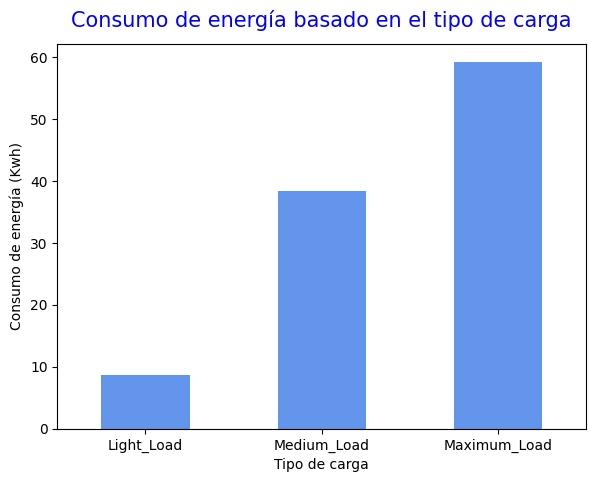

In [14]:
#Visualizar el consumo de energía basado en el tipo de carga
plt.rcParams['figure.figsize'] = (15,5)
plt.subplot(1, 2, 1)
chart = datos_acero.groupby('Load_Type')['Usage_kWh'].mean().sort_values(ascending = True).plot(kind = 'bar', color = 'cornflowerblue')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)
plt.title('Consumo de energía basado en el tipo de carga', fontsize = 15, color = 'b', pad = 12)
plt.xlabel('Tipo de carga')
plt.ylabel('Consumo de energía (Kwh)')

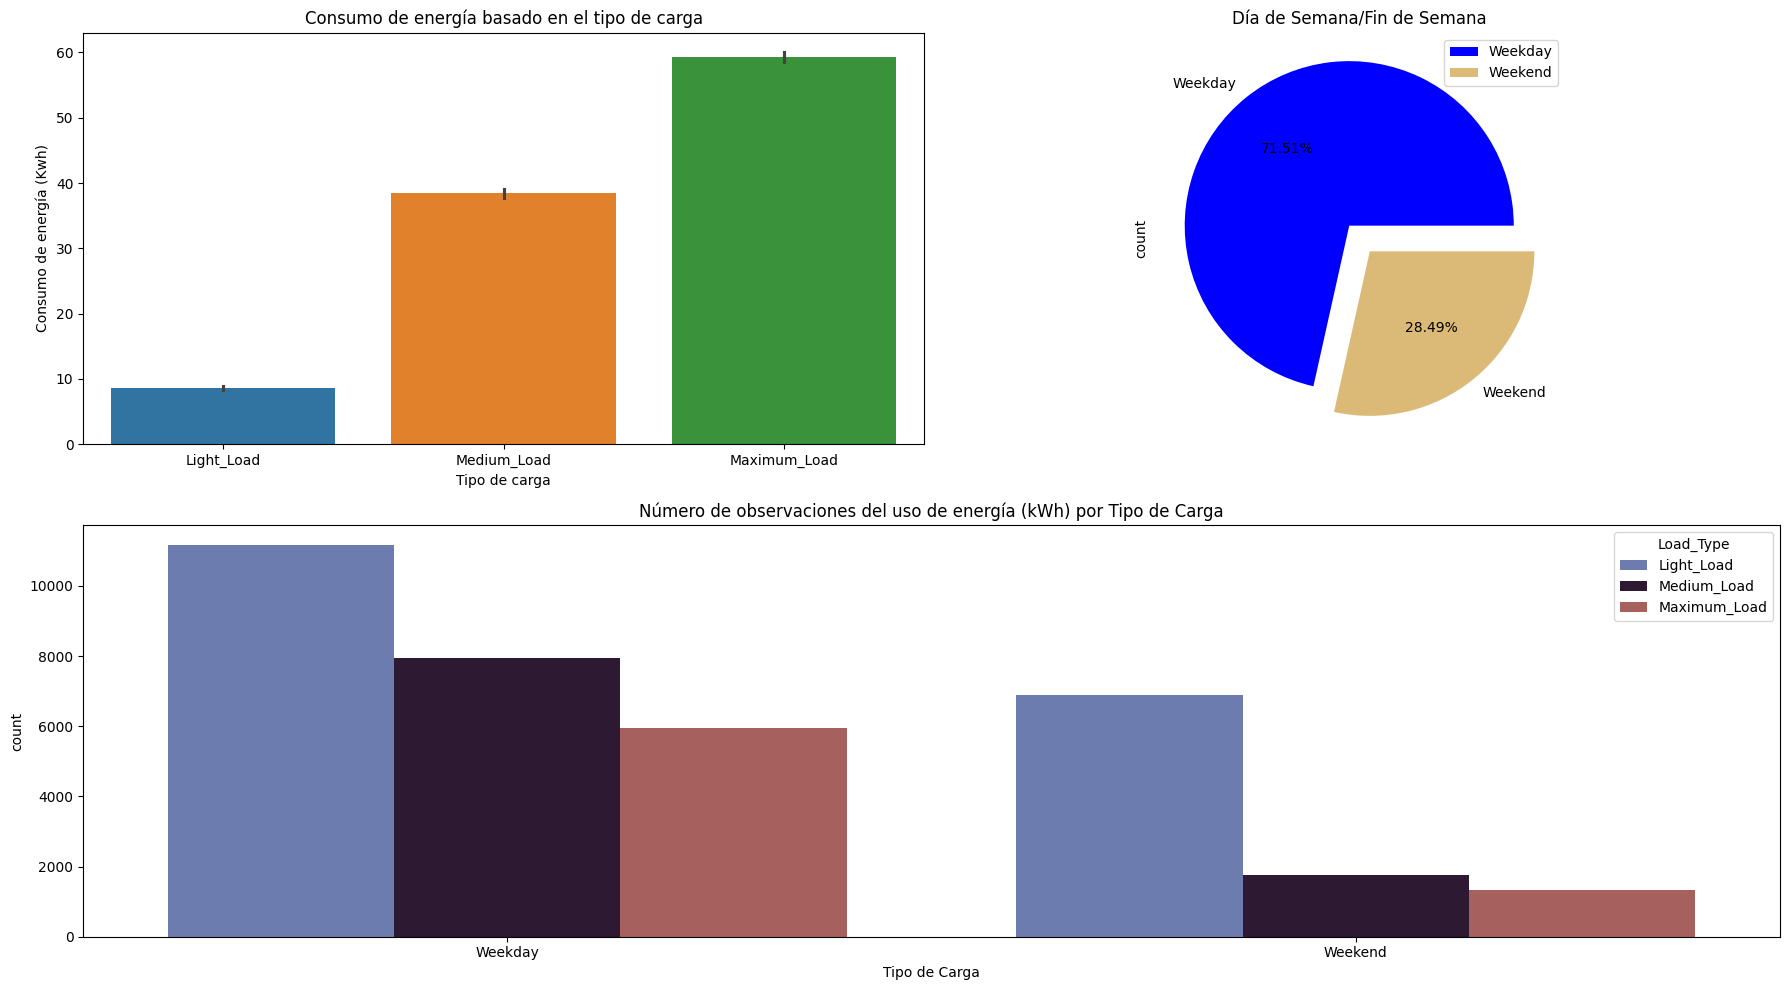

In [15]:
#Combo del tipo de carga

plt.figure(figsize=(18,10))

plt.subplot(2,2,1)
sns.barplot(x = 'Load_Type', y = 'Usage_kWh', palette= "tab10",data=datos_acero)
plt.title("Consumo de energía basado en el tipo de carga")
plt.xlabel("Tipo de carga")
plt.ylabel("Consumo de energía (Kwh)")

plt.subplot(2,2,2)
datos_acero["WeekStatus"].value_counts().plot.pie(autopct='%1.2f%%', explode=[0.1, 0.1], colors=['blue','#dbba78'])
p = plt.gcf()
plt.title("Día de Semana/Fin de Semana")
plt.legend()
plt.subplot(2,2,(3,4))

sns.countplot(x = 'WeekStatus', hue = 'Load_Type', data = datos_acero, palette="twilight")
plt.title("Número de observaciones del uso de energía (kWh) por Tipo de Carga")
plt.xlabel("Tipo de Carga")
plt.tight_layout()
plt.show()


## Feature importance usando Lasso

Train MSE: 23.024700155586533
Test MSE: 17.72258481317971


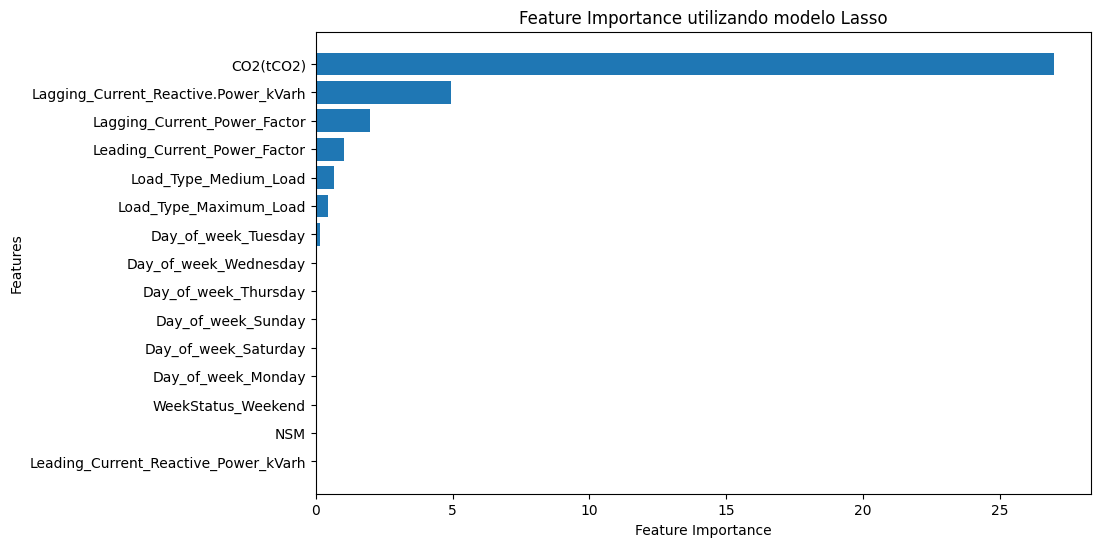

In [16]:
# Manejo de la información copia de los datos
datos_acero_3 = datos_acero.copy()
datos_acero_3 = datos_acero_3.drop('date', axis=1)
datos_acero_3 = datos_acero_3.dropna()

# Realizar "one hot encoding" de las variables categóricas
datos_acero_3 = pd.get_dummies(datos_acero_3, columns=['WeekStatus', 'Day_of_week', 'Load_Type'], drop_first=True)

# Definir las variables dependientes e independientes
X = datos_acero_3.drop('Usage_kWh', axis=1)
y = datos_acero_3['Usage_kWh']

# Generar conjuntos de datos de entrenamiento y de validación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo de regresión Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

# Evaluar el modelo
y_train_pred = lasso.predict(X_train_scaled)
y_test_pred = lasso.predict(X_test_scaled)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

# Recopilar la significancia de las características (features)
feature_importance = np.abs(lasso.coef_)
feature_names = X.columns

# Ordenar
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_feature_names = feature_names[sorted_idx]
sorted_feature_importance = feature_importance[sorted_idx]

# Graficar la feature importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance utilizando modelo Lasso')
plt.gca().invert_yaxis()  # Feature más importante arriba
plt.show()

## Feature importance usando Random Forest

Train MSE: 0.15460457254994228
Test MSE: 1.1537726983804206


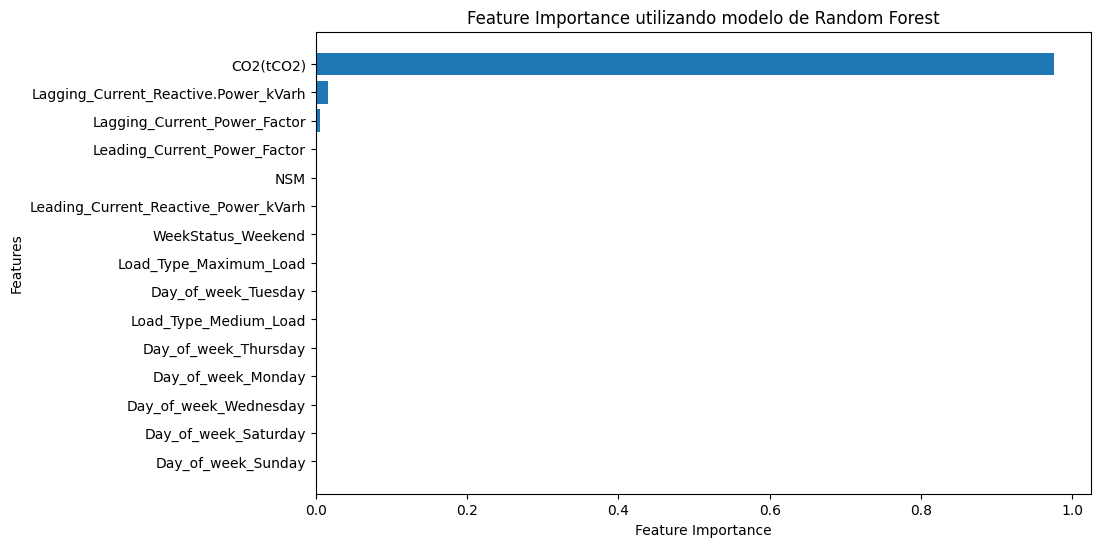

In [17]:
# Manejo de la información copia de los datos
datos_acero_4 = datos_acero.copy()
datos_acero_4 = datos_acero_4.drop('date', axis=1)
datos_acero_4 = datos_acero_4.dropna()

# Realizar "one hot encoding" de las variables categóricas
datos_acero_4 = pd.get_dummies(datos_acero_4, columns=['WeekStatus', 'Day_of_week', 'Load_Type'], drop_first=True)

# Definir las variables dependientes e independientes, no es necesario estandarizar, puesto que es random forest
X = datos_acero_4.drop('Usage_kWh', axis=1)
y = datos_acero_4['Usage_kWh']

# Generar conjuntos de datos de entrenamiento y de validación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest regression model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluar el modelo
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

# Recopilar la significancia de las características (features)
feature_importance = rf.feature_importances_
feature_names = X.columns

# Ordenar
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_feature_names = feature_names[sorted_idx]
sorted_feature_importance = feature_importance[sorted_idx]

# Graficar la feature importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance utilizando modelo de Random Forest')
plt.gca().invert_yaxis()  # Feature más importante arriba
plt.show()